# Email spam detection using Machine learning.

In [1]:
# first of all one must import all the required libraries then run the csv file 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('spam.csv',encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [2]:
# drop unnecessary columns

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
# renaming the columns name 

df.rename(columns={'v1':'type','v2':'content'}, inplace=True)
df

,type,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
# shows info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   type     5572 non-null   object
 1   content  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
# checks the dataset if any row has null value

df.isnull().sum()

type       0
content    0
dtype: int64

In [6]:
# tranfer the values of column 'type' to a variable a

a=df.type
a

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: type, Length: 5572, dtype: object

In [7]:
# transfer the values of column 'content' to a variable b

b=df.content
b

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: content, Length: 5572, dtype: object

In [8]:
# couting all the values of a i.e 'type' column

a.value_counts()

ham     4825
spam     747
Name: type, dtype: int64

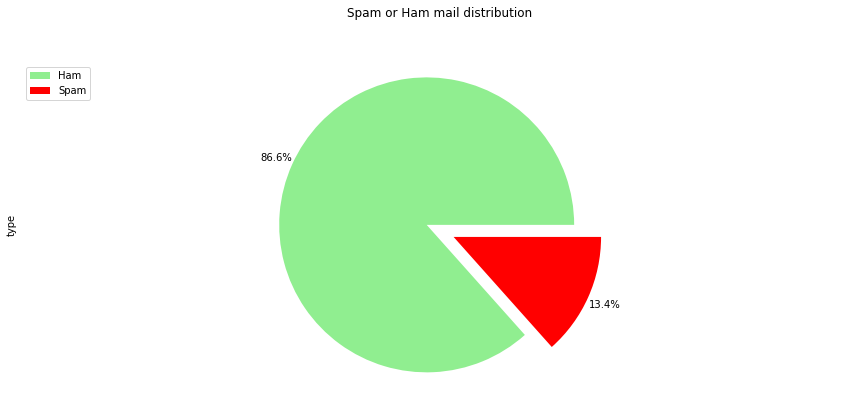

In [9]:
# graphical representation of type which contains values i.e Spam or Ham

colors_list=["lightgreen","red"]
explode_list=[0.1,0.1]

df['type'].value_counts().plot(kind="pie",
                                 figsize=(15,6),
                                autopct="%1.1f%%",
                                pctdistance=1.12,
                                 labels=None,
                                colors=colors_list,
                                explode=explode_list)
plt.title("Spam or Ham mail distribution",y=1.12)
plt.axis("equal")
plt.legend(labels=["Ham","Spam"],loc="upper left")
plt.show()

In [10]:
# importing all the libraries required for summarize the spam and ham

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [11]:
# initializing the models to variables

cv = CountVectorizer()
lr = LogisticRegression()
ps = PorterStemmer()

In [12]:
df

,type,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
# setting value of spam to 1 and not spam to 0 and apply anonymous function i.e lambda for stem the words of 'content' column

df['type'] = np.where(df['type'] == 'spam',1,0)
df['content'] = df['content'].apply(lambda x: ' '.join([ps.stem(word) for word in word_tokenize(x) if word not in (stopwords.words('english'))]))

In [14]:
# training model and test them with the help of logisticregression and countvectorizer and predict the values, count the f1_score

X_train, X_test, y_train, y_test = train_test_split(df.content, df.type, test_size=0.33, random_state=42)
X_train = cv.fit_transform(X_train).astype(int)
y_train = y_train.astype(int)
lr.fit(X_train, y_train)
lr_pred= lr.predict(cv.transform(X_test))
f1_score(y_test, lr_pred)

0.9260042283298098

In [15]:
X_train

<3733x6072 sparse matrix of type '<class 'numpy.int32'>'
	with 34832 stored elements in Compressed Sparse Row format>

In [16]:
X_test

3245    funni fact nobodi teach volcano 2 erupt , tsun...
944     i sent score sopha secondari applic school . i...
1044    we know someon know fanci . call 09058097218 f...
2484    onli promis get soon . and 'll text morn let k...
812     congratul ur award either å£500 cd gift vouche...
                              ...                        
4944    anyway i n't think i secur anyth , lem know wa...
3313          oh gei . that happend tron . mayb ill dl 3d
3652                   it issu right . ill fix tomorrow .
14                  i have a date on sunday with will ! !
4758    thank 4 continu support your question week ent...
Name: content, Length: 1839, dtype: object

In [17]:
y_train

3235    0
945     0
5319    0
5528    0
247     0
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: type, Length: 3733, dtype: int32

In [18]:
y_test

3245    0
944     0
1044    1
2484    0
812     1
       ..
4944    0
3313    0
3652    0
14      0
4758    1
Name: type, Length: 1839, dtype: int32

In [19]:
lr_pred

array([0, 0, 0, ..., 0, 0, 1])

In [20]:
# create new dataframe for showing results ad compare them

data = pd.DataFrame(lr_pred, columns = ['predict'], index = y_test.index.values).join(df[['content']])

In [21]:
# y_test data is shifted into actual column pf dataframe data

data['actual'] = y_test.tolist() 

In [22]:
# prediction is correct i.e yes or no for wrong prediction

data['pred_correct'] = np.where(data['actual'] == data['predict'], 'Yes', 'No')

# '1 for spam' and '0 for ham(not spam)'

In [23]:
# data stored in result.csv is displayed

data.to_csv('result.csv')
data.head(50)

,predict,content,actual,pred_correct
3245,0,"funni fact nobodi teach volcano 2 erupt , tsun...",0,Yes
944,0,i sent score sopha secondari applic school . i...,0,Yes
1044,0,we know someon know fanci . call 09058097218 f...,1,No
2484,0,onli promis get soon . and 'll text morn let k...,0,Yes
812,1,congratul ur award either å£500 cd gift vouche...,1,Yes
2973,0,"i 'll text carlo let know , hang",0,Yes
2991,0,k.i did't see . : ) k : ) ?,0,Yes
2942,0,no messag .. responc .. happend ?,0,Yes
230,0,get gandhipuram walk cross cut road . right si...,0,Yes
1181,0,you flippin shit yet ?,0,Yes


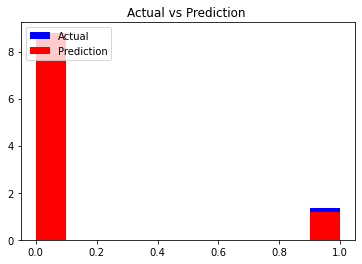

In [24]:
# graphical representation of actual vs prediction

plt.hist(data['actual'],label='Actual',color='blue', density=True)
plt.hist(data['predict'],label='Predicted',color='red', density=True)
plt.title('Actual vs Prediction ')
plt.legend(labels=["Actual","Prediction"],loc="upper left")
plt.show()

# another part for user based spam detection

In [25]:
# set the values of columns content and type to x and y

x = np.array(df['content'])
y =np.array(df['type'])

In [26]:
x=cv.fit_transform(x)

In [27]:
# training and test model 

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.33)

In [28]:
# multinomial naive baiyes is used for prediction of data 

clf= MultinomialNB()
clf.fit(x_train,y_train)

MultinomialNB()

In [29]:
userinput = input('Enter a message:')
df =cv.transform([userinput]).toarray()
print(clf.predict(df))

Enter a message: where are you
[0]


In [30]:
userinput = input('Enter a message:')
df =cv.transform([userinput]).toarray()
print(clf.predict(df))

Enter a message:whoo ! you won a reward of 50$
[1]


In [ ]:
# above both cells has a user input based prediction with the help of multinomoial naive baiyes 

# It represents whether the user input data is spam or not spam.